In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


with open("../Data/usersessions_cleaned.csv", "r", encoding="utf-8") as f:
    lines = [line.strip().split(",") for line in f]

max_cols = max(len(row) for row in lines)

lines_padded = [row + ['']*(max_cols - len(row)) for row in lines]

df2 = pd.DataFrame(lines_padded, columns=[f"col_{i}" for i in range(max_cols)])

transactions = df2.apply(lambda row: [str(x) for x in row if str(x).strip() not in ["", "NA"]], axis=1).tolist()

In [2]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)



In [3]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 315


In [4]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
rules = rules[
    (rules['antecedents'].apply(len) > 0) &
    (rules['consequents'].apply(len) > 0)
]
print("Association Rules:", rules.shape[0])
rules_sorted_conf = rules.sort_values(by="confidence", ascending=False)
rules_sorted_conf.head(10)


Association Rules: 1188


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1127,"(/elv/TITAN, /elv/PEGASUS, /elv/SCOUT, /elv/AT...",(/elv),0.010996,0.016392,0.010996,1.000000,61.003534,1.0,0.010816,inf,0.994543,0.670789,1.000000,0.835395
1067,"(/elv/DELTA, /elv/TITAN, /elv/SCOUT, /elv/PEGA...",(/elv),0.011054,0.016392,0.011054,1.000000,61.003534,1.0,0.010873,inf,0.994602,0.674323,1.000000,0.837161
261,"(/elv/TITAN, /elv/PEGASUS)",(/elv),0.011189,0.016392,0.011189,1.000000,61.003534,1.0,0.011006,inf,0.994738,0.682568,1.000000,0.841284
1037,"(/elv/TITAN, /elv/ATLAS_CENTAUR, /elv/SCOUT, /...",(/elv),0.011006,0.016392,0.011006,1.000000,61.003534,1.0,0.010825,inf,0.994553,0.671378,1.000000,0.835689
748,"(/elv/TITAN, /elv/DELTA, /elv/PEGASUS)",(/elv),0.011092,0.016392,0.011092,1.000000,61.003534,1.0,0.010911,inf,0.994641,0.676678,1.000000,0.838339
977,"(/elv/TITAN, /elv/ATLAS_CENTAUR, /elv/DELTA, /...",(/elv),0.011025,0.016392,0.011025,1.000000,61.003534,1.0,0.010844,inf,0.994573,0.672556,1.000000,0.836278
706,"(/elv/ATLAS_CENTAUR, /elv/TITAN, /elv/PEGASUS)",(/elv),0.011035,0.016392,0.011035,1.000000,61.003534,1.0,0.010854,inf,0.994582,0.673145,1.000000,0.836572
777,"(/elv/TITAN, /elv/SCOUT, /elv/PEGASUS)",(/elv),0.011121,0.016392,0.011121,1.000000,61.003534,1.0,0.010939,inf,0.994670,0.678445,1.000000,0.839223
218,"(/elv/ATLAS_CENTAUR, /elv/PEGASUS)",(/elv),0.011276,0.016392,0.011266,0.999144,60.951305,1.0,0.011081,1148.853568,0.994811,0.686875,0.999130,0.843211
650,"(/elv/ATLAS_CENTAUR, /elv/DELTA, /elv/PEGASUS)",(/elv),0.011237,0.016392,0.011228,0.999141,60.951125,1.0,0.011043,1144.919138,0.994772,0.684520,0.999127,0.842032


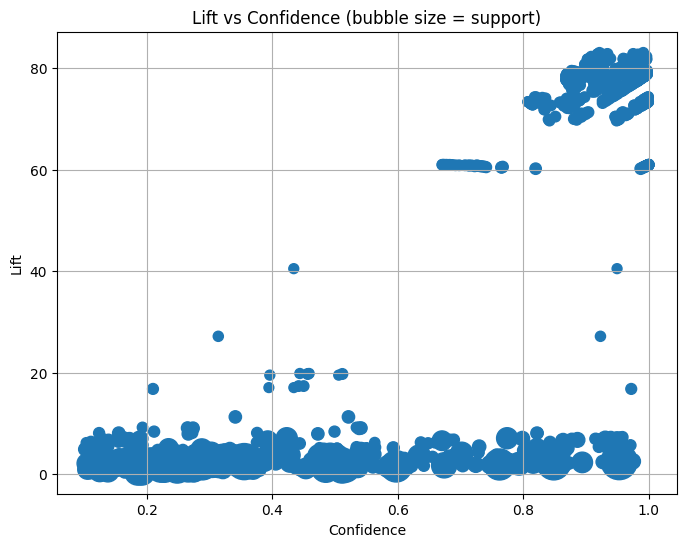

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], s=rules['support']*5000)

plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Lift vs Confidence (bubble size = support)")
plt.grid(True)
plt.show()

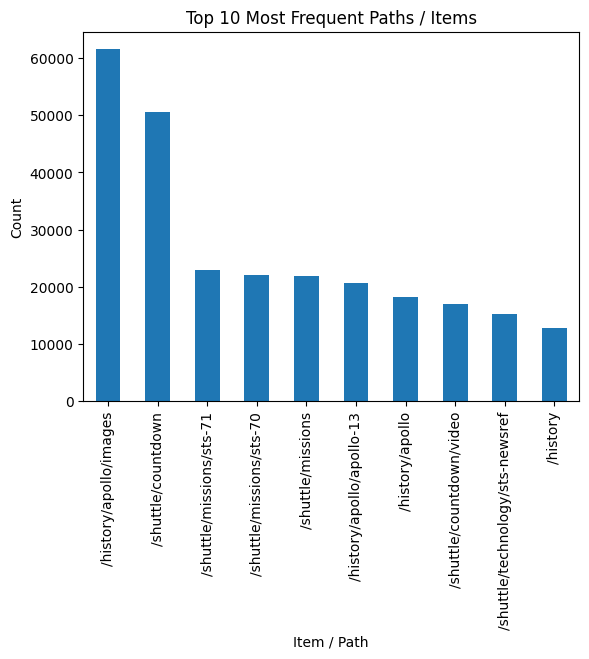

In [6]:
import matplotlib.pyplot as plt

all_items = df2.values.flatten()  

all_items = [str(x) for x in all_items if str(x).strip() not in ["", "NA"]]

items_series = pd.Series(all_items)

top_items = items_series.value_counts().head(10)

top_items.plot(kind='bar', title='Top 10 Most Frequent Paths / Items')
plt.xlabel("Item / Path")
plt.ylabel("Count")
plt.show()


In [ ]:
rules.to_csv("../Data/apriori/apriori_rules.csv", index=False)
top_items.to_csv("../Data/apriori/apriori_top_items.csv", index=False)